<a href="https://colab.research.google.com/github/raafilsamad/projectai/blob/master/fake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Adjust the path to your file location in Google Drive
df = pd.read_csv('/content/drive/MyDrive/Fake.csv')
df.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# Basic info
print(df.info())

# Check for null values
print(df.isnull().sum())

# Drop rows with missing text or title
df.dropna(subset=["title", "text"], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None
title      0
text       0
subject    0
date       0
dtype: int64


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


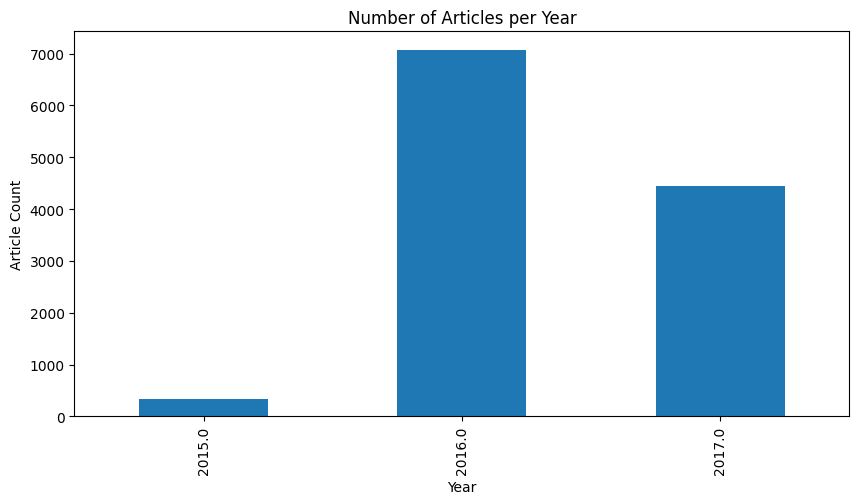

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Articles per Year")
plt.xlabel("Year")
plt.ylabel("Article Count")
plt.show()


In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)
    return text

df['clean_title'] = df['title'].apply(clean_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['clean_title'])

print("TF-IDF shape:", X.shape)


TF-IDF shape: (23481, 15687)


In [ ]:
from sklearn.cluster import KMeans

# Try clustering into 2 groups (could be fake/real)
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# View a few titles per cluster
df.groupby('cluster')['title'].head(3)


,title
0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...
60,Pro-Trump Group Is Now Using Pictures Of An O...
62,Former Obama Photographer Takes Trolling Trum...


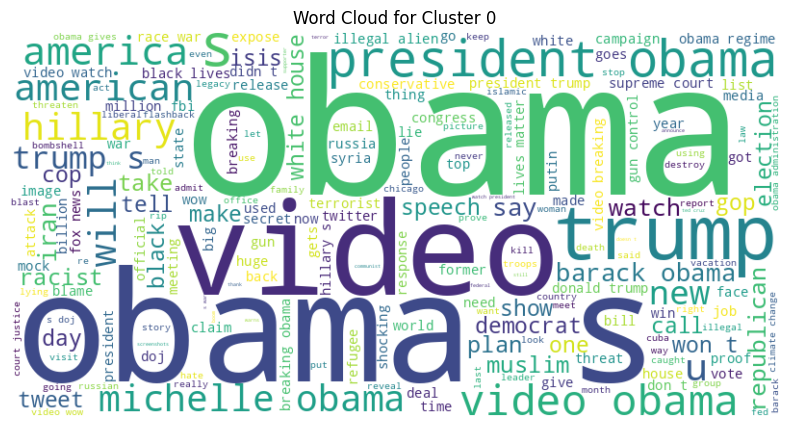

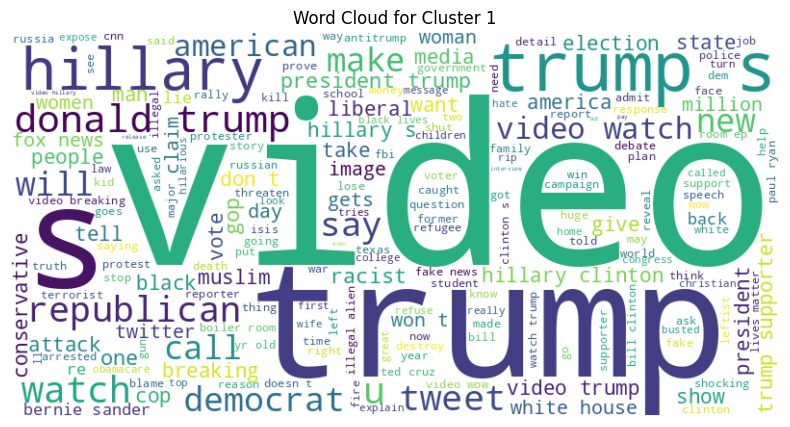

In [ ]:
from wordcloud import WordCloud

for i in range(2):
    text = " ".join(df[df['cluster'] == i]['clean_title'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {i}")
    plt.show()


Cluster Distribution:
 cluster
1    21013
0     2468
Name: count, dtype: int64


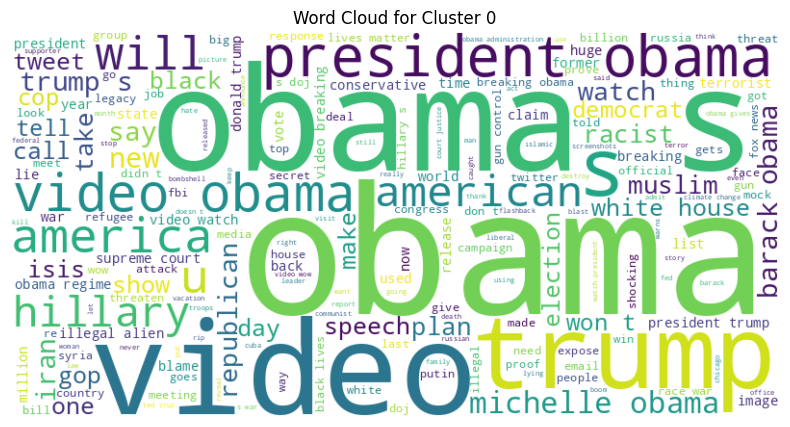

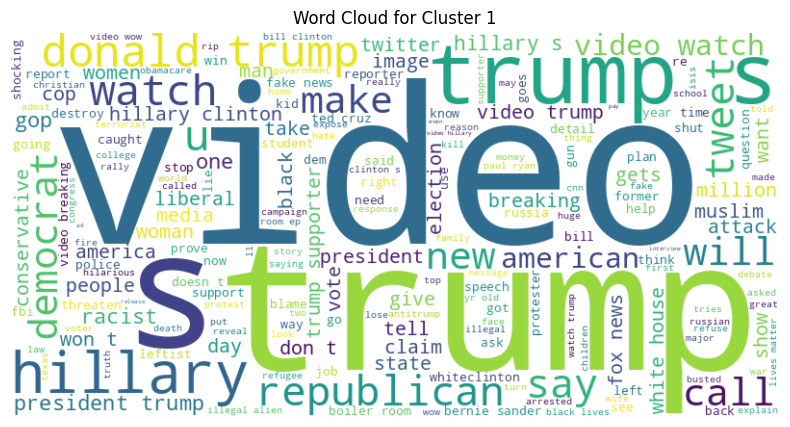

Sample Titles from Cluster 0:
3      Trump Is So Obsessed He Even Has Obama’s Name...
60     Pro-Trump Group Is Now Using Pictures Of An O...
62     Former Obama Photographer Takes Trolling Trum...
70     Ivanka Defends Malia Obama From Attacks, Her ...
88     Trump Admin. Tosses Out Another Obama Rule – ...
Name: title, dtype: object

Sample Titles from Cluster 1:
0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
4     Pope Francis Just Called Out Donald Trump Dur...
5     Racist Alabama Cops Brutalize Black Boy While...
Name: title, dtype: object


In [ ]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud

# STEP 2: Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Fake.csv')  # Change path if needed

# STEP 3: Preprocess Text
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_title'] = df['title'].astype(str).apply(clean_text)

# STEP 4: Convert Text to TF-IDF Features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['clean_title'])

# STEP 5: Apply KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# STEP 6: Display Cluster Counts
print("Cluster Distribution:\n", df['cluster'].value_counts())

# STEP 7: Visualize WordCloud for Each Cluster
for i in range(2):
    text = " ".join(df[df['cluster'] == i]['clean_title'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {i}")
    plt.show()

# STEP 8: Analyze Titles by Cluster
print("Sample Titles from Cluster 0:")
print(df[df['cluster'] == 0]['title'].head(5))

print("\nSample Titles from Cluster 1:")
print(df[df['cluster'] == 1]['title'].head(5))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize text for LDA
vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=10)
X = vectorizer.fit_transform(df['clean_title'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Show top words per topic
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"\nTopic {idx + 1}:")
    print([words[i] for i in topic.argsort()[-10:]])



Topic 1:
['new', 'speech', 'fbi', 'room', 'obama', 'breaking', 'clinton', 'trump', 'hillary', 'video']

Topic 2:
['muslim', 'old', 'watch', 'gun', 'america', 'illegal', 'clinton', 'hillary', 'obama', 'video']

Topic 3:
['republican', 'white', 'house', 'president', 'donald', 'obama', 'just', 'gop', 'video', 'trump']

Topic 4:
['liberal', 'president', 'rally', 'media', 'people', 'white', 'watch', 'black', 'trump', 'video']

Topic 5:
['fake', 'bernie', 'just', 'fox', 'obama', 'hillary', 'watch', 'news', 'video', 'trump']


In [ ]:
!pip install -q textblob
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['clean_title'].apply(get_sentiment)

# Check sentiment range
df[['title', 'sentiment_score']].head()


,title,sentiment_score
0,Donald Trump Sends Out Embarrassing New Year’...,-0.181818
1,Drunk Bragging Trump Staffer Started Russian ...,-0.250000
2,Sheriff David Clarke Becomes An Internet Joke...,0.000000
3,Trump Is So Obsessed He Even Has Obama’s Name...,-0.500000
4,Pope Francis Just Called Out Donald Trump Dur...,0.000000


from matplotlib import pyplot as plt
_df_0['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='sentiment_score', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df['text_length'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

df[['title', 'text_length', 'word_count']].head()


,title,text_length,word_count
0,Donald Trump Sends Out Embarrassing New Year’...,2893,495
1,Drunk Bragging Trump Staffer Started Russian ...,1898,305
2,Sheriff David Clarke Becomes An Internet Joke...,3597,580
3,Trump Is So Obsessed He Even Has Obama’s Name...,2774,444
4,Pope Francis Just Called Out Donald Trump Dur...,2346,420


from matplotlib import pyplot as plt
_df_4['text_length'].plot(kind='hist', bins=20, title='text_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['word_count'].plot(kind='hist', bins=20, title='word_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='text_length', y='word_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['text_length'].plot(kind='line', figsize=(8, 4), title='text_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='text_length', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='word_count', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

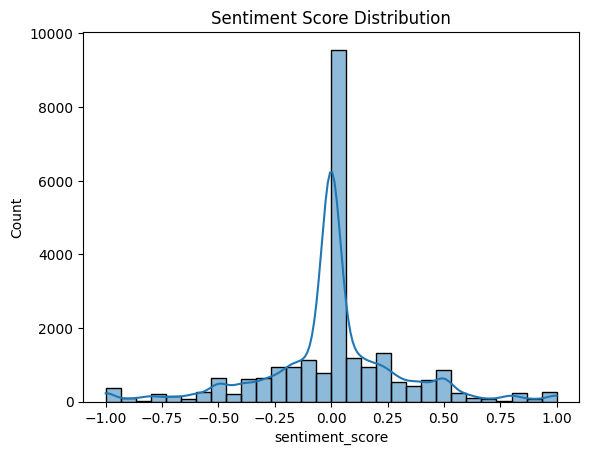

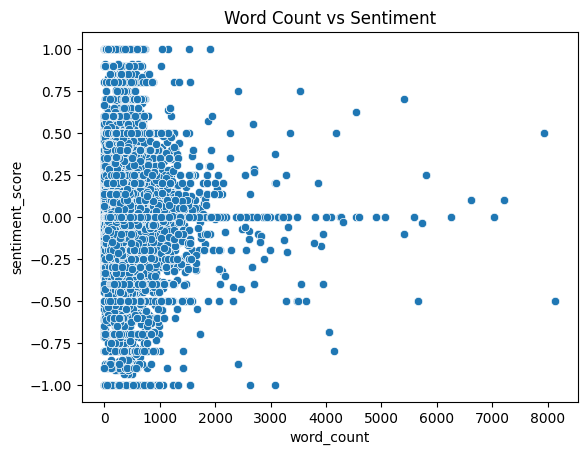

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()

# Word count vs sentiment
sns.scatterplot(x='word_count', y='sentiment_score', data=df)
plt.title("Word Count vs Sentiment")
plt.show()


In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
#name entity recognition
!pip install -q spacy
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(df['text'][0])
for ent in doc.ents:
    print(ent.text, ent.label_)


Donald Trump PERSON
Americans NORP
New Year EVENT
one CARDINAL
Fake News Media WORK_OF_ART
Healthy New Year EVENT
Angry Pants PERSON
2018 DATE
a great year DATE
America GPE
Fake News Media WORK_OF_ART
Healthy New Year EVENT
2018 DATE
a great year DATE
America GPE
Donald J. Trump PERSON
@realDonaldTrump ORG
December 31 DATE
2017Trump CARDINAL
New Year EVENT
Trump ORG
American NORP
Talbert Swan PERSON
December 31 DATE
2017no ORDINAL
Calvin PERSON
December 31 DATE
2017Your CARDINAL
2018 DATE
America GPE
Congress ORG
Miranda Yaver PERSON
@mirandayaver GPE
December 31 DATE
2017Do CARDINAL
Alan Sandoval PERSON
@AlanSandoval13 GPE
December 31 DATE
2017Who DATE
Haters ORG
December 31 DATE
new year DATE
Koren PERSON
December 31 DATE
Trump ORG
New Year s Eve EVENT
2016.Happy CARDINAL
New Year EVENT
don PERSON
Donald J. Trump PERSON
@realDonaldTrump ORG
December 31 DATE
Trump ORG
years DATE
Trump ORG
New Year EVENT
Easter GPE
Thanksgiving DATE
9/11 CARDINAL
pic.twitter.com/4FPAe2KypA ORG
Daniel D

In [ ]:
df.tail()

In [ ]:
     import os
     os.kill(os.getpid(), 9)